In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

$X= ``Número\ de\ gols\ do\ time\ de\ casa" \sim Poisson(\lambda_x)\\$
$Y= ``Número\ de\ gols\ do\ time\ visitante" \sim Poisson(\lambda_x)$

$$P(X=x)=\frac{\lambda^{x}_{x}e^{-\lambda_x}}{x!}\qquad P(Y=y)=\frac{\lambda^{y}_{y}e^{-\lambda_y}}{y!}\\$$

$$P(X=x, Y=y)=P(X=x)P(Y=y)=\frac{\lambda_{x}^{x}\lambda_{y}^{y}e^{-(\lambda_x+\lambda_y)}}{x!y!}$$

# Verificação e validação do modelo

In [ ]:
tabela = pd.read_excel('dados/tabela_brasileirao(rodada-26).xlsx')
historico = pd.read_excel('dados/historico_casa(2023-10-08).xlsx')

1.4517374517374517
1.3494058842896062


<Axes: xlabel='GF', ylabel='Count'>

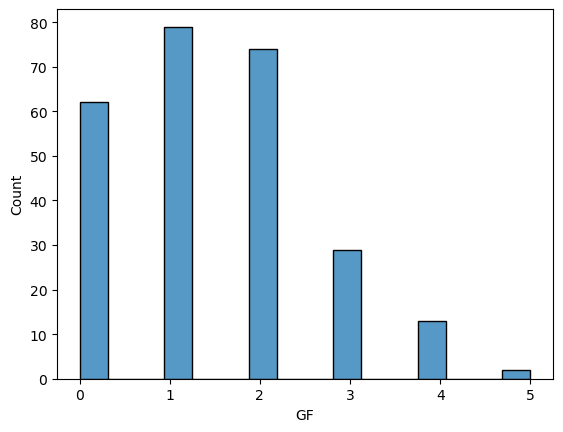

In [288]:
print(historico['GF'].mean())
print(historico['GF'].var())
sns.histplot(historico['GF'])

1.4907335907335908
0.5332471341773668


<Axes: xlabel='xG', ylabel='Count'>

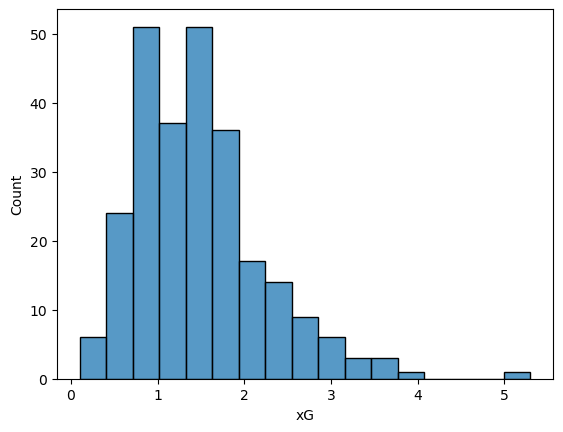

In [289]:
print(historico['xG'].mean())
print(historico['xG'].var())
sns.histplot(historico['xG'])

In [301]:
historico['GF'].corr(historico['GF'].shift(1))

0.04307913279446908

In [312]:
historico['GF'].corr(historico['GA'])

0.021404961417770277

In [319]:
m, v, s, k = stats.poisson.stats(1.5, moments='mvsk')
stats.ttest_1samp(historico['GF'], m)


TtestResult(statistic=-0.6686345765523165, pvalue=0.5043264017523823, df=258)

In [334]:
print(s)
print(1/np.sqrt(historico['GF'].mean()))

print


0.816496580927726
0.829957702075258


In [323]:
stats.kstest(historico['GF'], 'poisson', (1.5,))

KstestResult(statistic=0.3184431609888354, pvalue=7.411608243081791e-24, statistic_location=1, statistic_sign=-1)

((array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
         2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,

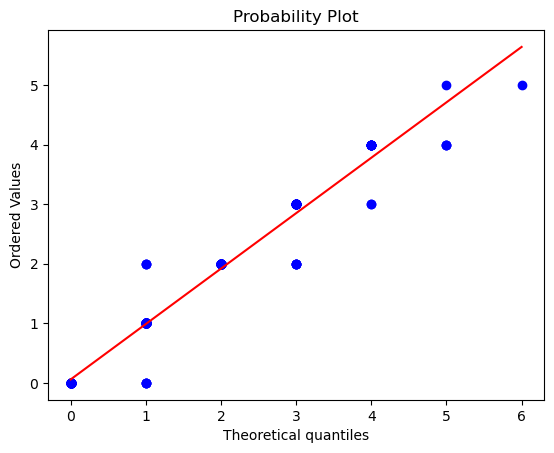

In [332]:
stats.probplot(historico['GF'], dist=stats.poisson, sparams=(1.5,), plot=plt)

In [265]:
#poisson.pmf(k, mu, loc)

def gerar_prob(timex_str, timey_str, lambdax, lambday):
  timex = []
  for k in range(0, 11):
    timex.append(stats.poisson.pmf(k, lambdax))

  timey = []
  for k in range(0, 11):
    timey.append(stats.poisson.pmf(k, lambday))

  df_prob1 = pd.DataFrame({timex_str: timex, timey_str: timey})

  df_prob2 = pd.DataFrame()
  x_win_percent = []
  y_win_percent = []

  for i in range(1, len(df_prob1) - 1):
      x_win_percent.append(df_prob1['Cuiaba'][i + 1] * sum(df_prob1['Cruzeiro'][df_prob1['Cruzeiro'].index < i]))
      y_win_percent.append(df_prob1['Cruzeiro'][i + 1] * sum(df_prob1['Cuiaba'][df_prob1['Cuiaba'].index < i]))

  df_prob2[f'{timex_str} Win% if score'] = x_win_percent
  df_prob2[f'{timey_str} Win% if score'] = y_win_percent
  df_prob2.index = pd.RangeIndex(1,10)

  win_cuiaba = sum(df_prob2[f'{timex_str} Win% if score'])
  win_cruzeiro = sum(df_prob2[f'{timey_str} Win% if score'])

  df_prob3 = pd.DataFrame({f'{timex_str} Win%': [win_cuiaba], f'{timey_str} Win%': [win_cruzeiro]})

  df_final = pd.concat([df_prob1, df_prob2, df_prob3], axis=1)
  df_final.loc[0, 'empate'] = 1-(df_final['Cruzeiro Win%'][0] + df_final['Cuiaba Win%'][0])
  df_final.loc[1, 'empate'] = 1/df_final.loc[0, 'empate']
  df_final.loc[1, f'{timex_str} Win%'] = 1/df_final.loc[0, f'{timex_str} Win%']
  df_final.loc[1, f'{timey_str} Win%'] = 1/df_final.loc[0, f'{timey_str} Win%']

  return df_final

# MODELO 1
xG esperado para a partida

In [266]:
xg_cruzeiro_1410 = (0.14+3.87+1.63+1.56+1.74+0.35+0.66+0.58+0.88+0.97)/10
xg_cuiaba_1410 = (9.72+1.80+0.90+1.18+2.14+0.42+0.91+0.76)/10

In [267]:
df_1410 = gerar_prob('Cuiaba', 'Cruzeiro', xg_cuiaba_1410, xg_cruzeiro_1410)
df_1410.to_excel('dados/previsoes/previsao1410-cuiabavscruzeiro.xlsx')

In [268]:
df_1410

,Cuiaba,Cruzeiro,Cuiaba Win% if score,Cruzeiro Win% if score,Cuiaba Win%,Cruzeiro Win%,empate
0,0.168133,2.899636e-01,NaN,NaN,0.276429,0.109111,0.614460
1,0.299781,3.589749e-01,0.077494,3.736007e-02,3.617560,9.164972,1.627447
2,0.267255,2.222055e-01,0.103076,4.290622e-02,NaN,NaN,NaN
3,0.158838,9.169679e-02,0.061679,2.086421e-02,NaN,NaN,NaN
4,0.070802,2.838016e-02,0.024310,6.282125e-03,NaN,NaN,NaN
5,0.025248,7.026926e-03,0.007437,1.398867e-03,NaN,NaN,NaN
6,0.007503,1.449889e-03,0.001908,2.538738e-04,NaN,NaN,NaN
7,0.001911,2.564233e-04,0.000426,3.958470e-05,NaN,NaN,NaN
8,0.000426,3.968150e-05,0.000084,5.455527e-06,NaN,NaN,NaN
9,0.000084,5.458411e-06,0.000015,6.756821e-07,NaN,NaN,NaN


# MODELO 2
ATT Rating = (Gols Feitos no campeonato/Partidas Jogadas)/Média de gols da liga\
DEF Rating = (Gols Sofridos no campeonato/Partidas Jogadas)/Média de gols da liga\
EXPECTED GOALS = ATTxDEFxAVGLeague

In [271]:
#ATT Rating = (Gols Feitos no campeonato/Partidas Jogadas)/gols_liga
#DEF Rating = (Gols Sofridos no campeonato/Partidas Jogadas)/gols_liga
#EXPECTED GOALS = ATTxDEFxAVGLeague

gols_feitos = tabela['GF']/tabela['MP']
gols_tomados = tabela['GA']/tabela['MP']
gols_liga = tabela['GF']/tabela['MP'].mean()

att_rating = gols_feitos/gols_liga
def_rating = gols_tomados/gols_liga

tabela['expG'] = att_rating*def_rating*gols_liga

In [272]:
df_1410_modelo2 = gerar_prob('Cuiaba', 'Cruzeiro', float(tabela[tabela['Squad'] == 'Cuiabá']['expG']), float(tabela[tabela['Squad'] == 'Cruzeiro']['expG']))
df_1410_modelo2.to_excel('dados/previsoes/previsao1410-cuiabavscruzeiro_modelo2.xlsx')

In [273]:
df_1410_modelo2

,Cuiaba,Cruzeiro,Cuiaba Win% if score,Cruzeiro Win% if score,Cuiaba Win%,Cruzeiro Win%,empate
0,2.884597e-01,4.018486e-01,NaN,NaN,0.196215,0.093469,0.710316
1,3.586131e-01,3.663573e-01,8.957762e-02,4.817285e-02,5.096462,10.698693,1.407824
2,2.229139e-01,1.670003e-01,7.096341e-02,3.283912e-02,NaN,NaN,NaN
3,9.237551e-02,5.075028e-02,2.685006e-02,1.006314e-02,NaN,NaN,NaN
4,2.871031e-02,1.156700e-02,7.038281e-03,2.029700e-03,NaN,NaN,NaN
5,7.138531e-03,2.109081e-03,1.475441e-03,3.176069e-04,NaN,NaN,NaN
6,1.479104e-03,3.204679e-04,2.625923e-04,4.166306e-05,NaN,NaN,NaN
7,2.626888e-04,4.173773e-05,4.081992e-05,4.754958e-06,NaN,NaN,NaN
8,4.082184e-05,4.756432e-06,5.638827e-06,4.817932e-07,NaN,NaN,NaN
9,5.638857e-06,4.818160e-07,7.010223e-07,4.392592e-08,NaN,NaN,NaN


# MODELO 3
lambda = xg(total) + xg(casa) + gols marcados(total) + gols marcados(casa) + xG(escalação)/5

In [276]:
cruzeiro_xgfora = historico[historico['Opponent'] == 'Cruzeiro']['xG'].mean()
cruzeiro_xgtotal = historico[(historico['Opponent'] == 'Cruzeiro') | (historico['Equipe'] == 'Cruzeiro')]['xG'].mean()
cruzeiro_golsfora = historico[historico['Opponent'] == 'Cruzeiro']['GA'].mean()
cruzeiro_golstotal = (cruzeiro_golsfora + historico[historico['Equipe'] == 'Cruzeiro']['GF'].mean())/2
xg_cruzeiro_1410

cuiaba_xgcasa = historico[historico['Equipe'] == 'Cuiaba']['xG'].mean()
cuiaba_xgtotal = historico[(historico['Opponent'] == 'Cuiabá') | (historico['Equipe'] == 'Cuiaba')]['xG'].mean()
cuiaba_golscasa = historico[historico['Equipe'] == 'Cuiaba']['GF'].mean()
cuiaba_golstotal = (cuiaba_golscasa + historico[historico['Opponent'] == 'Cuiabá']['GA'].mean())/2
xg_cuiaba_1410


1.7830000000000006

In [277]:
lambda_x =(cuiaba_xgcasa + cuiaba_xgtotal + cuiaba_golscasa + cuiaba_golstotal + xg_cuiaba_1410)/5
lambda_y = (cruzeiro_xgfora + cruzeiro_xgtotal + cruzeiro_golsfora + cruzeiro_golstotal + xg_cruzeiro_1410)/5

In [278]:
df_1410_madao = gerar_prob('Cuiaba', 'Cruzeiro', lambda_x, lambda_y)
df_1410_madao.to_excel("dados/previsoes/previsao1410-cuiabavscruzeiro_Modelo3.xlsx")